In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np

In [2]:
df=pd.read_excel('./dataset/Pistachio_28_Features_Dataset.xlsx')

features = df.drop('Class', axis=1)

In [3]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [3]:
features.dropna(how='any',axis=0,inplace=True)

In [4]:
features.isnull().sum()

Area             0
Perimeter        0
Major_Axis       0
Minor_Axis       0
Eccentricity     0
Eqdiasq          0
Solidity         0
Convex_Area      0
Extent           0
Aspect_Ratio     0
Roundness        0
Compactness      0
Shapefactor_1    0
Shapefactor_2    0
Shapefactor_3    0
Shapefactor_4    0
Mean_RR          0
Mean_RG          0
Mean_RB          0
StdDev_RR        0
StdDev_RG        0
StdDev_RB        0
Skew_RR          0
Skew_RG          0
Skew_RB          0
Kurtosis_RR      0
Kurtosis_RG      0
Kurtosis_RB      0
dtype: int64

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()#数据预处理，使特征的均值为0，标准差为1
pipe = Pipeline([("scaler",StandardScaler()),#数据预处理
                ("pca",PCA(n_components=14))])#pca主成成分分析，n_comp为5意思是将特征数降到5个

X_tr = pipe.fit_transform(features)#返回降维后的数据
print(pipe["pca"].components_)

[[-2.89131765e-01  3.03339727e-02 -1.56197475e-01 -2.38531269e-01
   1.35357529e-01 -2.91459814e-01 -1.68975312e-01 -2.52927069e-01
  -1.55359323e-01  1.62755750e-01 -1.44478739e-01 -2.19488134e-01
   2.96402889e-01  1.88543131e-01 -2.15941481e-01 -1.35451442e-01
  -2.52749020e-01 -2.49382917e-01 -2.04838641e-01 -6.93113381e-02
  -6.45738283e-02 -2.33915024e-02  2.30610088e-01  2.28580595e-01
   1.60001725e-01 -1.21693233e-01 -7.78685668e-02  2.96533951e-02]
 [ 6.29709625e-02  2.95172681e-01 -1.18350622e-01  2.79812134e-01
  -3.45046025e-01  6.01262116e-02 -2.76001047e-01  1.65905363e-01
  -1.66320480e-01 -3.32556666e-01 -2.62476896e-01  2.22702262e-01
  -1.28130654e-01  2.36180244e-01  2.25229243e-01 -2.76309501e-01
  -7.57785048e-02 -1.01850962e-01 -9.18558384e-02  1.63088164e-02
   4.65588410e-02 -7.49253034e-03  1.45302552e-01  1.08101775e-01
   6.79359298e-02 -1.85371062e-01 -1.63048765e-01 -9.38487822e-02]
 [ 8.61953241e-02 -5.39720825e-02 -2.56964470e-03  7.70383062e-02
  -8.205

In [8]:
#打印出pca的值
dict(zip(features.columns,pipe["pca"].explained_variance_ratio_))
# Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Equi

{'Area': 0.31944801828040736,
 'Perimeter': 0.19576862199861428,
 'Major_Axis': 0.1531642604223196,
 'Minor_Axis': 0.10048333009058129,
 'Eccentricity': 0.09285172719719471,
 'Eqdiasq': 0.03491086792590389,
 'Solidity': 0.02351704536400504,
 'Convex_Area': 0.018710734750113065,
 'Extent': 0.014463717500977472,
 'Aspect_Ratio': 0.013002961269522181,
 'Roundness': 0.009821276478912847,
 'Compactness': 0.006626297182741502,
 'Shapefactor_1': 0.005639776657111501,
 'Shapefactor_2': 0.002444075533948459}

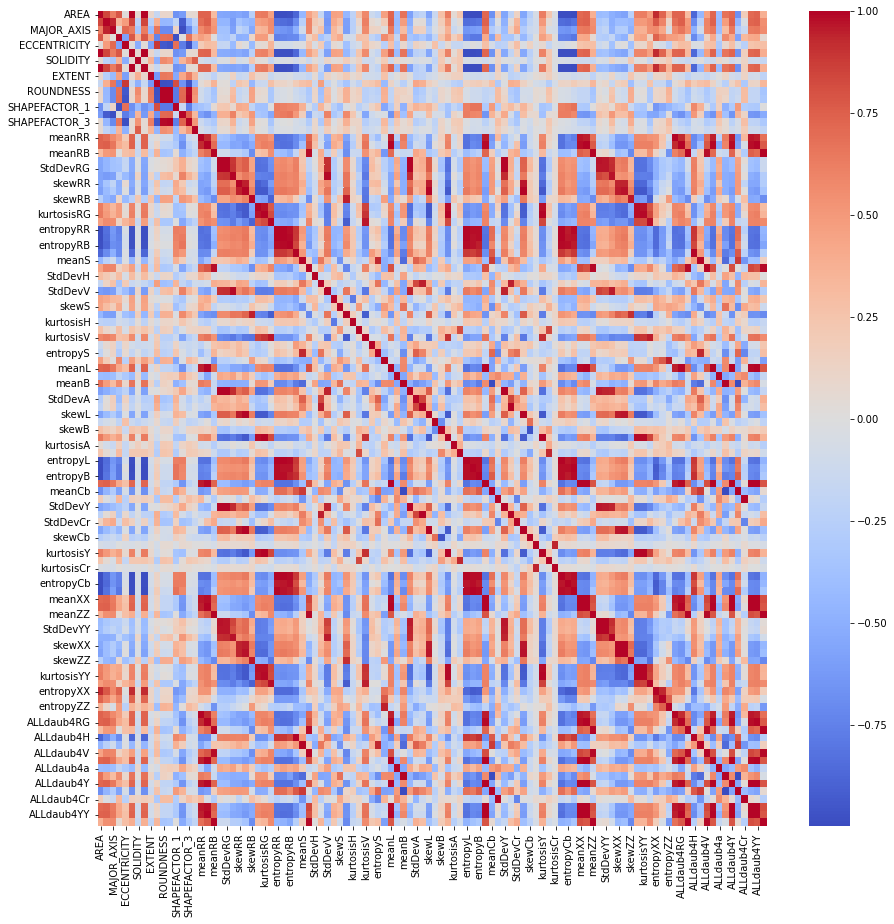

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
f = plt.figure(figsize=(15,15))#图的长宽大小
# print(df.corr(method='spearman'))
sns.heatmap(features.corr(method='pearson'),cmap="coolwarm")#corr画热力图所用的，cmap是颜色
plt.show()

In [ ]:
#计算
res=np.corrcoef(features,rowvar=False)

In [ ]:
print(res)

[[1.         0.8413773  0.62621232 ... 0.71745568 0.73873248 0.37819238]
 [0.8413773  1.         0.94502406 ... 0.73277951 0.74848287 0.55332269]
 [0.62621232 0.94502406 1.         ... 0.63727921 0.64960883 0.56561269]
 ...
 [0.71745568 0.73277951 0.63727921 ... 1.         0.99269797 0.81393469]
 [0.73873248 0.74848287 0.64960883 ... 0.99269797 1.         0.78236147]
 [0.37819238 0.55332269 0.56561269 ... 0.81393469 0.78236147 1.        ]]
